In [50]:
# Imports etc.
import pylab
import torch
import matplotlib
import matplotlib.pyplot as plt

from src.losses.spatial_consistency_loss import spatial_consistency_loss
from src.utils.kpt_utils import kpts_2_img_coordinates, get_active_kpts

In [51]:
# Load data
sample_nr = 17
sample = torch.load(f'/home/yannik/vssil/eval/ulosd_acrobot_64pix/ulosd_sample_{sample_nr}/sample.pt')
ulosd_kpts = torch.load(f'/home/yannik/vssil/eval/ulosd_acrobot_64pix/ulosd_sample_{sample_nr}/key_points.pt')
transporter_kpts = torch.load(f'/home/yannik/vssil/eval/transporter_acrobot_64pix/transporter_sample_{sample_nr}/key_points.pt')
print(sample.shape)
print(ulosd_kpts.shape)
print(transporter_kpts.shape)

torch.Size([1, 30, 3, 64, 64])
torch.Size([1, 30, 64, 3])
torch.Size([1, 29, 3, 2])


In [52]:
# Filter for active kpts
active_ulosd_kpts = get_active_kpts(ulosd_kpts, intensity_threshold=0.5)
active_transporter_kpts = get_active_kpts(transporter_kpts)
print(active_ulosd_kpts.shape)
print(active_transporter_kpts.shape)

torch.Size([1, 30, 5, 3])
torch.Size([1, 29, 3, 2])


In [53]:
# Modify kpts for this example
active_ulosd_kpts = active_ulosd_kpts[:, :, [0, 1, 2], :]
# active_ulosd_kpts[..., :2] += (torch.rand_like(active_ulosd_kpts[..., :2]) - 0.5)/4
_active_transporter_kpts = torch.clone(active_transporter_kpts)
active_transporter_kpts[..., :2] += (torch.rand_like(active_transporter_kpts[..., :2]) - 0.5)/2
print(active_ulosd_kpts.shape)

torch.Size([1, 30, 3, 3])


In [54]:
_ulosd_kpts = torch.clone(active_ulosd_kpts)
_ulosd_kpts[..., :2] *= -1

ulosd_img_coordinates = kpts_2_img_coordinates(_ulosd_kpts, (sample.shape[-2:]))
transporter_img_coordinates = kpts_2_img_coordinates(active_transporter_kpts, (sample.shape[-2:]))
_transporter_img_coordinates = kpts_2_img_coordinates(_active_transporter_kpts, (sample.shape[-2:]))

print(ulosd_img_coordinates.shape)
print(transporter_img_coordinates.shape)
print(_transporter_img_coordinates.shape)

torch.Size([1, 30, 3, 3])
torch.Size([1, 29, 3, 2])
torch.Size([1, 29, 3, 2])


In [55]:
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

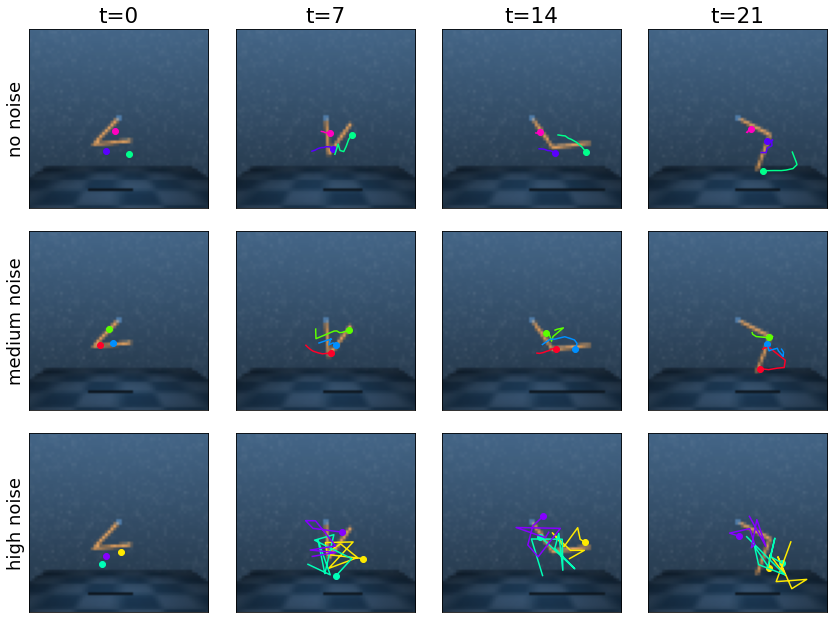

In [64]:
nt = 4
dt = 7
l = dt
fig, ax = plt.subplots(3, nt, figsize=(12, 9), sharey=True, sharex=True)
cm = pylab.get_cmap('gist_rainbow')
for i, t in enumerate(range(0, nt*dt, dt)):
    ax[0, i].set_title(f't={t}')
    ax[0, 0].set_ylabel('no noise')
    ax[0, 0].set_yticks([])
    
    ax[0, i].imshow(sample[0, t].permute(1, 2, 0))
    #ax[0, i].axis('off')
    for k in range(_transporter_img_coordinates.shape[2]):
        ax[0, i].scatter(_transporter_img_coordinates[0, t, k, 0], _transporter_img_coordinates[0, t, k, 1],
                         color=cm(1.*k/_transporter_img_coordinates.shape[2] + 0.5))
        ax[0, i].set_xticks([])
        if i > 0:
            ax[0, i].plot(_transporter_img_coordinates[0, t-l:t+1, k, 0], _transporter_img_coordinates[0, t-l:t+1, k, 1],
                          color=cm(1.*k/_transporter_img_coordinates.shape[2] + 0.5))
    
    ax[1, i].imshow(sample[0, t].permute(1, 2, 0))
    ax[1, 0].set_ylabel('medium noise')
    for k in range(ulosd_img_coordinates.shape[2]):
        ax[1, i].scatter(ulosd_img_coordinates[0, t, k, 0], ulosd_img_coordinates[0, t, k, 1],
                         color=cm(1.*k/ulosd_img_coordinates.shape[2]))
        if i > 0:
            ax[1, i].plot(ulosd_img_coordinates[0, t-l:t+1, k, 0], ulosd_img_coordinates[0, t-l:t+1, k, 1],
                          color=cm(1.*k/ulosd_img_coordinates.shape[2]))
        
    ax[2, i].imshow(sample[0, t].permute(1, 2, 0))
    ax[2, 0].set_ylabel('high noise')
    for k in range(transporter_img_coordinates.shape[2]):
        ax[2, i].scatter(transporter_img_coordinates[0, t, k, 0], transporter_img_coordinates[0, t, k, 1],
                         color=cm(1.*k/transporter_img_coordinates.shape[2] + 0.2))
        if i > 0:
            ax[2, i].plot(transporter_img_coordinates[0, t-l:t+1, k, 0], transporter_img_coordinates[0, t-l:t+1, k, 1],
                          color=cm(1.*k/transporter_img_coordinates.shape[2] + 0.2))
    

plt.tight_layout()
plt.show()
fig.savefig('/home/yannik/smoothness_metric_samples.svg', bbox_inches='tight')
plt.close()

In [62]:
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

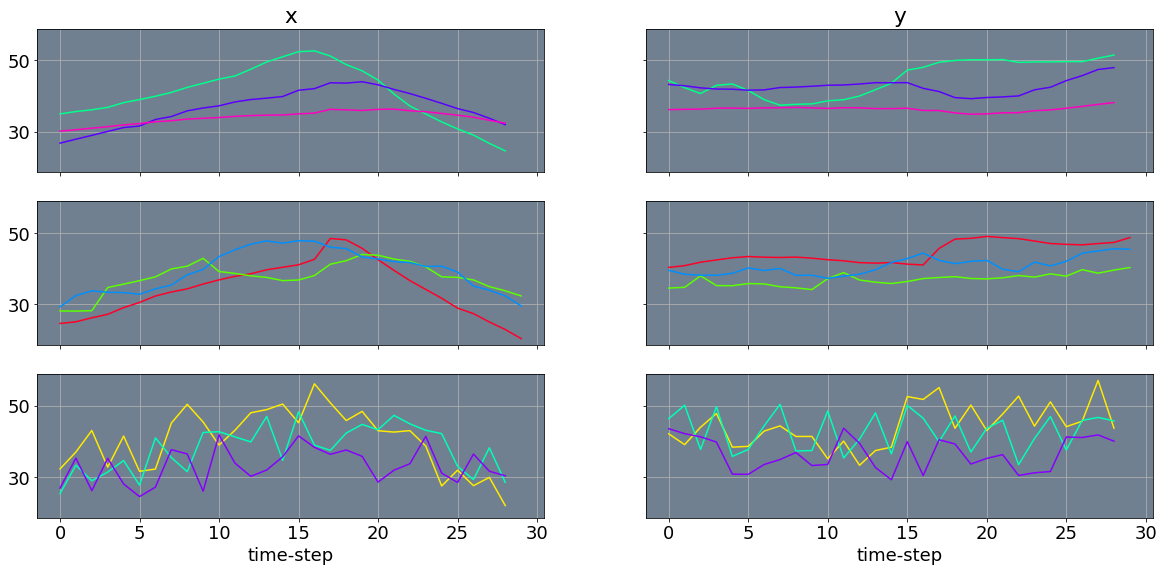

In [63]:
face_color = 'slategrey'

fig, ax = plt.subplots(3, 2, figsize=(20, 9), sharex=True, sharey=True)
for k in range(transporter_img_coordinates.shape[2]):
    ax[0, 0].set_title('x')
    ax[0, 1].set_title('y')
    
    ax[0, 0].plot(_transporter_img_coordinates[0, :, k, 0], color=cm(1.*k/_transporter_img_coordinates.shape[2] + 0.5))
    ax[0, 0].set_yticks([30, 50])
    ax[0, 0].set_facecolor(face_color)
    ax[0, 0].grid('on')
    ax[0, 1].plot(_transporter_img_coordinates[0, :, k, 1], color=cm(1.*k/_transporter_img_coordinates.shape[2] + 0.5))
    ax[0, 1].set_facecolor(face_color)
    ax[0, 1].grid('on')
    
    ax[1, 0].plot(ulosd_img_coordinates[0, :, k, 0], color=cm(1.*k/ulosd_img_coordinates.shape[2]))
    ax[1, 0].set_yticks([30, 50])
    ax[1, 0].set_facecolor(face_color)
    ax[1, 0].grid('on')
    ax[1, 1].plot(ulosd_img_coordinates[0, :, k, 1], color=cm(1.*k/ulosd_img_coordinates.shape[2]))
    ax[1, 1].set_facecolor(face_color)
    ax[1, 1].grid('on')
    
    ax[2, 0].plot(transporter_img_coordinates[0, :, k, 0], color=cm(1.*k/transporter_img_coordinates.shape[2] + 0.2))
    ax[2, 0].set_xlabel('time-step')
    ax[2, 0].set_yticks([30, 50])
    ax[2, 0].set_facecolor(face_color)
    ax[2, 0].grid('on')
    ax[2, 1].plot(transporter_img_coordinates[0, :, k, 1], color=cm(1.*k/transporter_img_coordinates.shape[2] + 0.2))
    ax[2, 1].set_xlabel('time-step')
    ax[2, 1].set_facecolor(face_color)
    ax[2, 1].grid('on')

plt.show()
fig.savefig('/home/yannik/smoothness_metric_magnitudes.svg', bbox_inches='tight')
plt.close()

In [59]:
print(spatial_consistency_loss(_active_transporter_kpts))

tensor(0.0202)


In [60]:
print(spatial_consistency_loss(active_ulosd_kpts))

tensor(0.0486)


In [61]:
print(spatial_consistency_loss(active_transporter_kpts))

tensor(0.1101)
